In [1]:
import os
os.chdir('../')


In [2]:
import src.cfg.data as cfg_data
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
print(cfg_data.data_cfg['data_path'])
print(cfg_data.data_cfg['data_file'])

./data/raw/
measures_v2.csv


In [4]:
PATH = os.path.join(cfg_data.data_cfg['data_path'], cfg_data.data_cfg['data_file'])
df = pd.read_csv(PATH)

In [5]:
df.head()


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [6]:
df.shape

(1330816, 13)

In [7]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [8]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [9]:
df['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71], dtype=int64)

<Axes: >

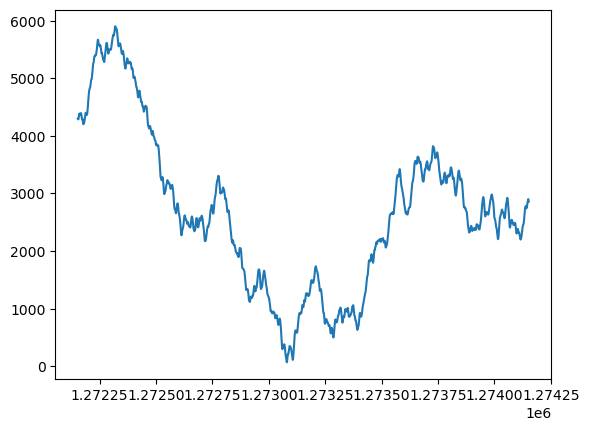

In [5]:
df[df['profile_id'] == 46]['motor_speed'].iloc[0:2000].plot()


<Axes: xlabel='profile_id'>

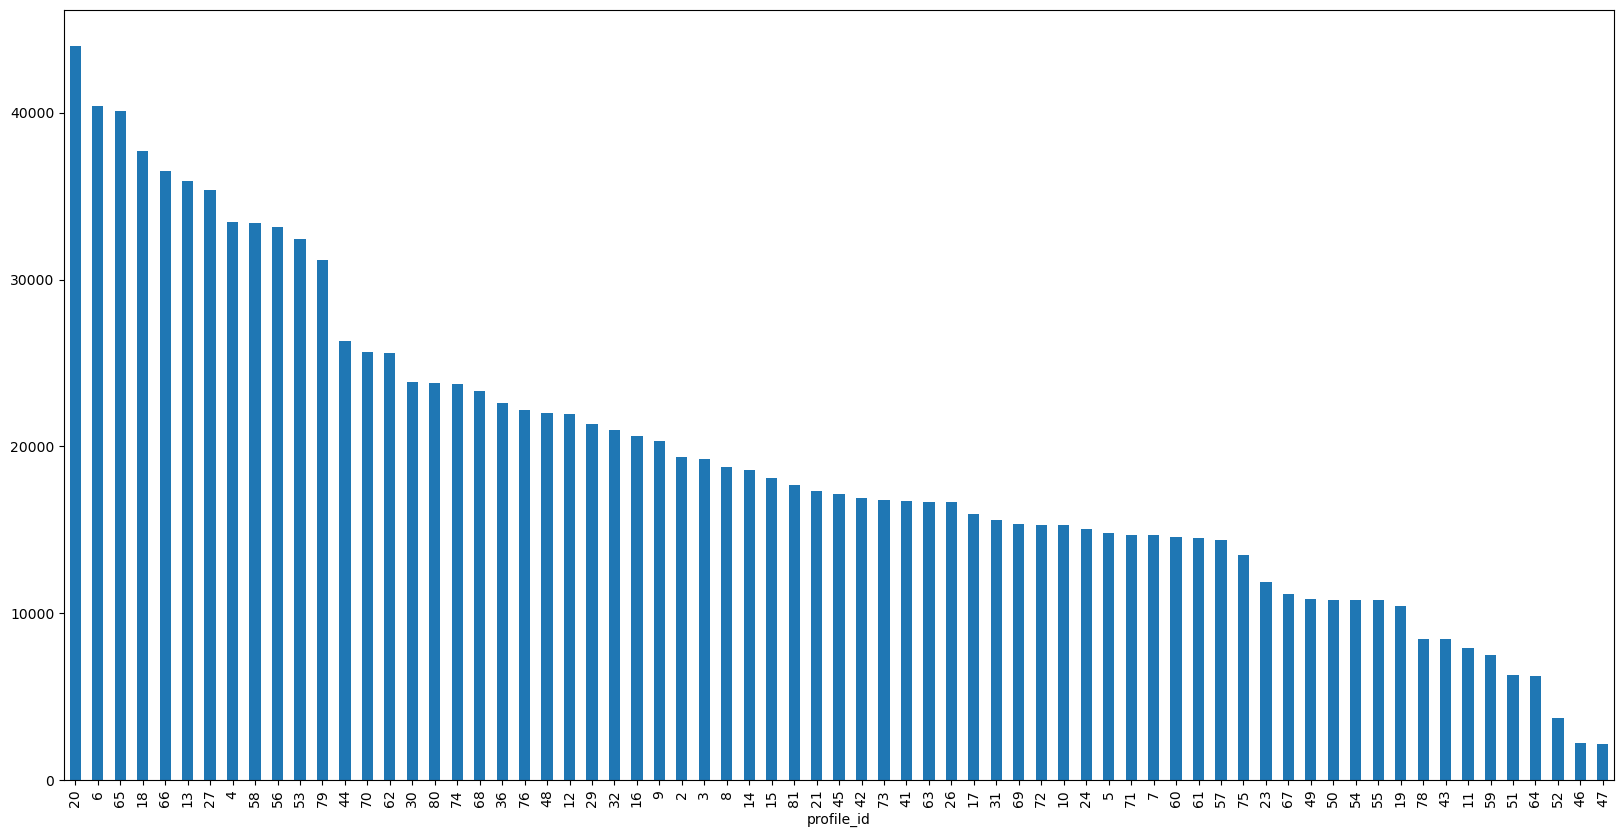

In [11]:
plt.figure(figsize=(20,10))
df['profile_id'].value_counts().plot(kind='bar')

In [15]:
grpd = {id: df_ for id, df_ in df.groupby('profile_id')}

In [13]:
grpd.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 26, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81])

In [1]:
import os
os.chdir('../')
print(os.getcwd())
import src.visualisation.viz as viz
import src.cfg.data as cfg_data
import pandas as pd

PATH = os.path.join(cfg_data.data_cfg['data_path'], cfg_data.data_cfg['data_file'])
df = pd.read_csv(PATH)


c:\Users\yanni\Documents\Projects\Electric_Motor_Temperature


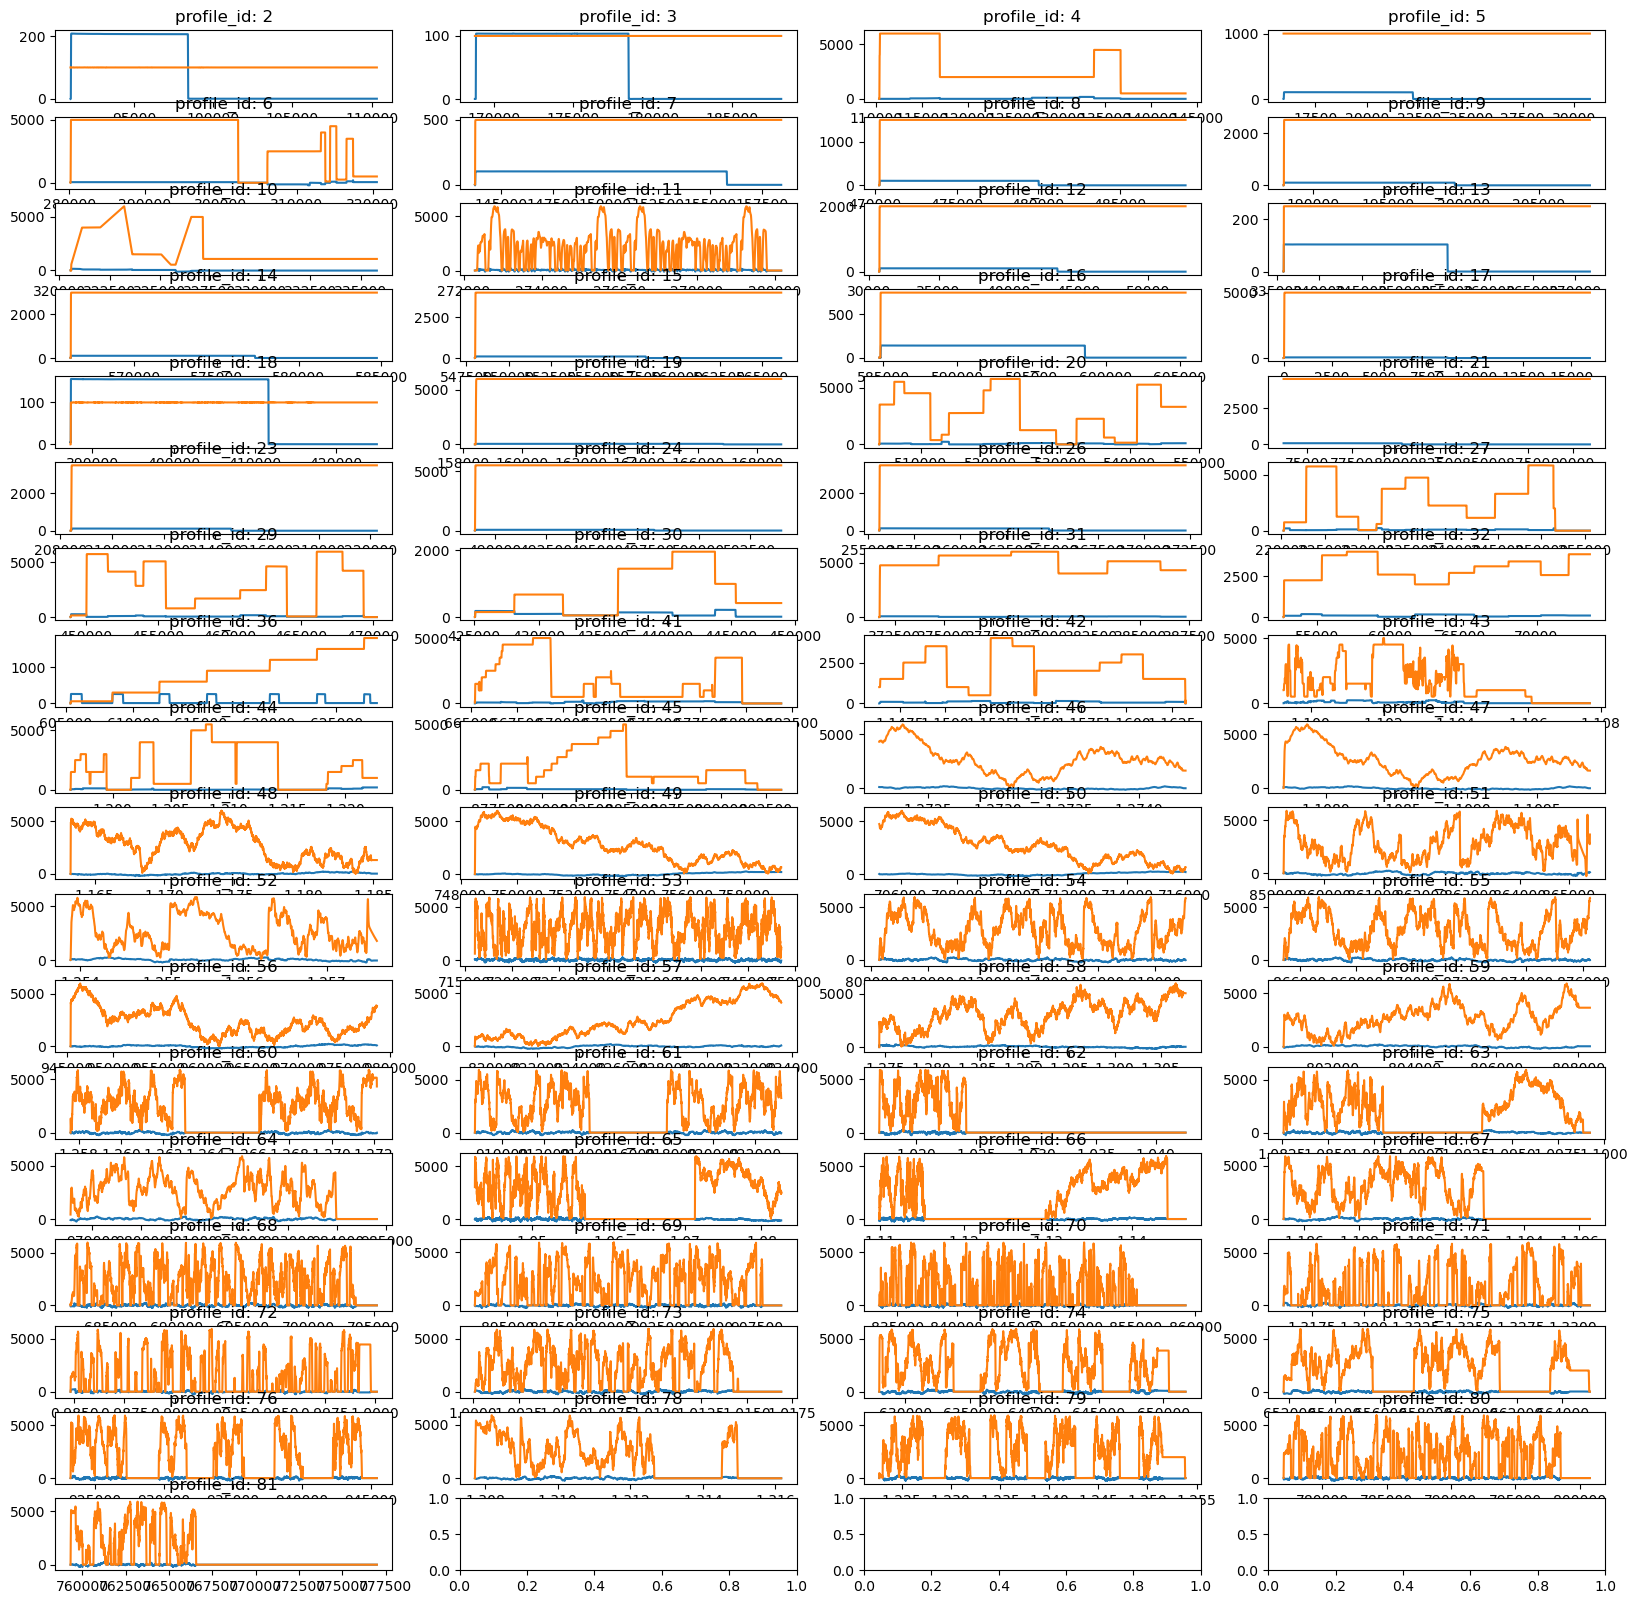

In [2]:

vis = viz.Visualisation(df)

#vis.viz_pairplot( id=2, features=cfg_data.data_cfg['features'], targets=cfg_data.data_cfg['target']) 
vis.viz_scatter(target='motor_speed', feature='torque')

trace de courbe pour tout les profils

TODO : creer une fonction avec en parametres le nom des colonnes

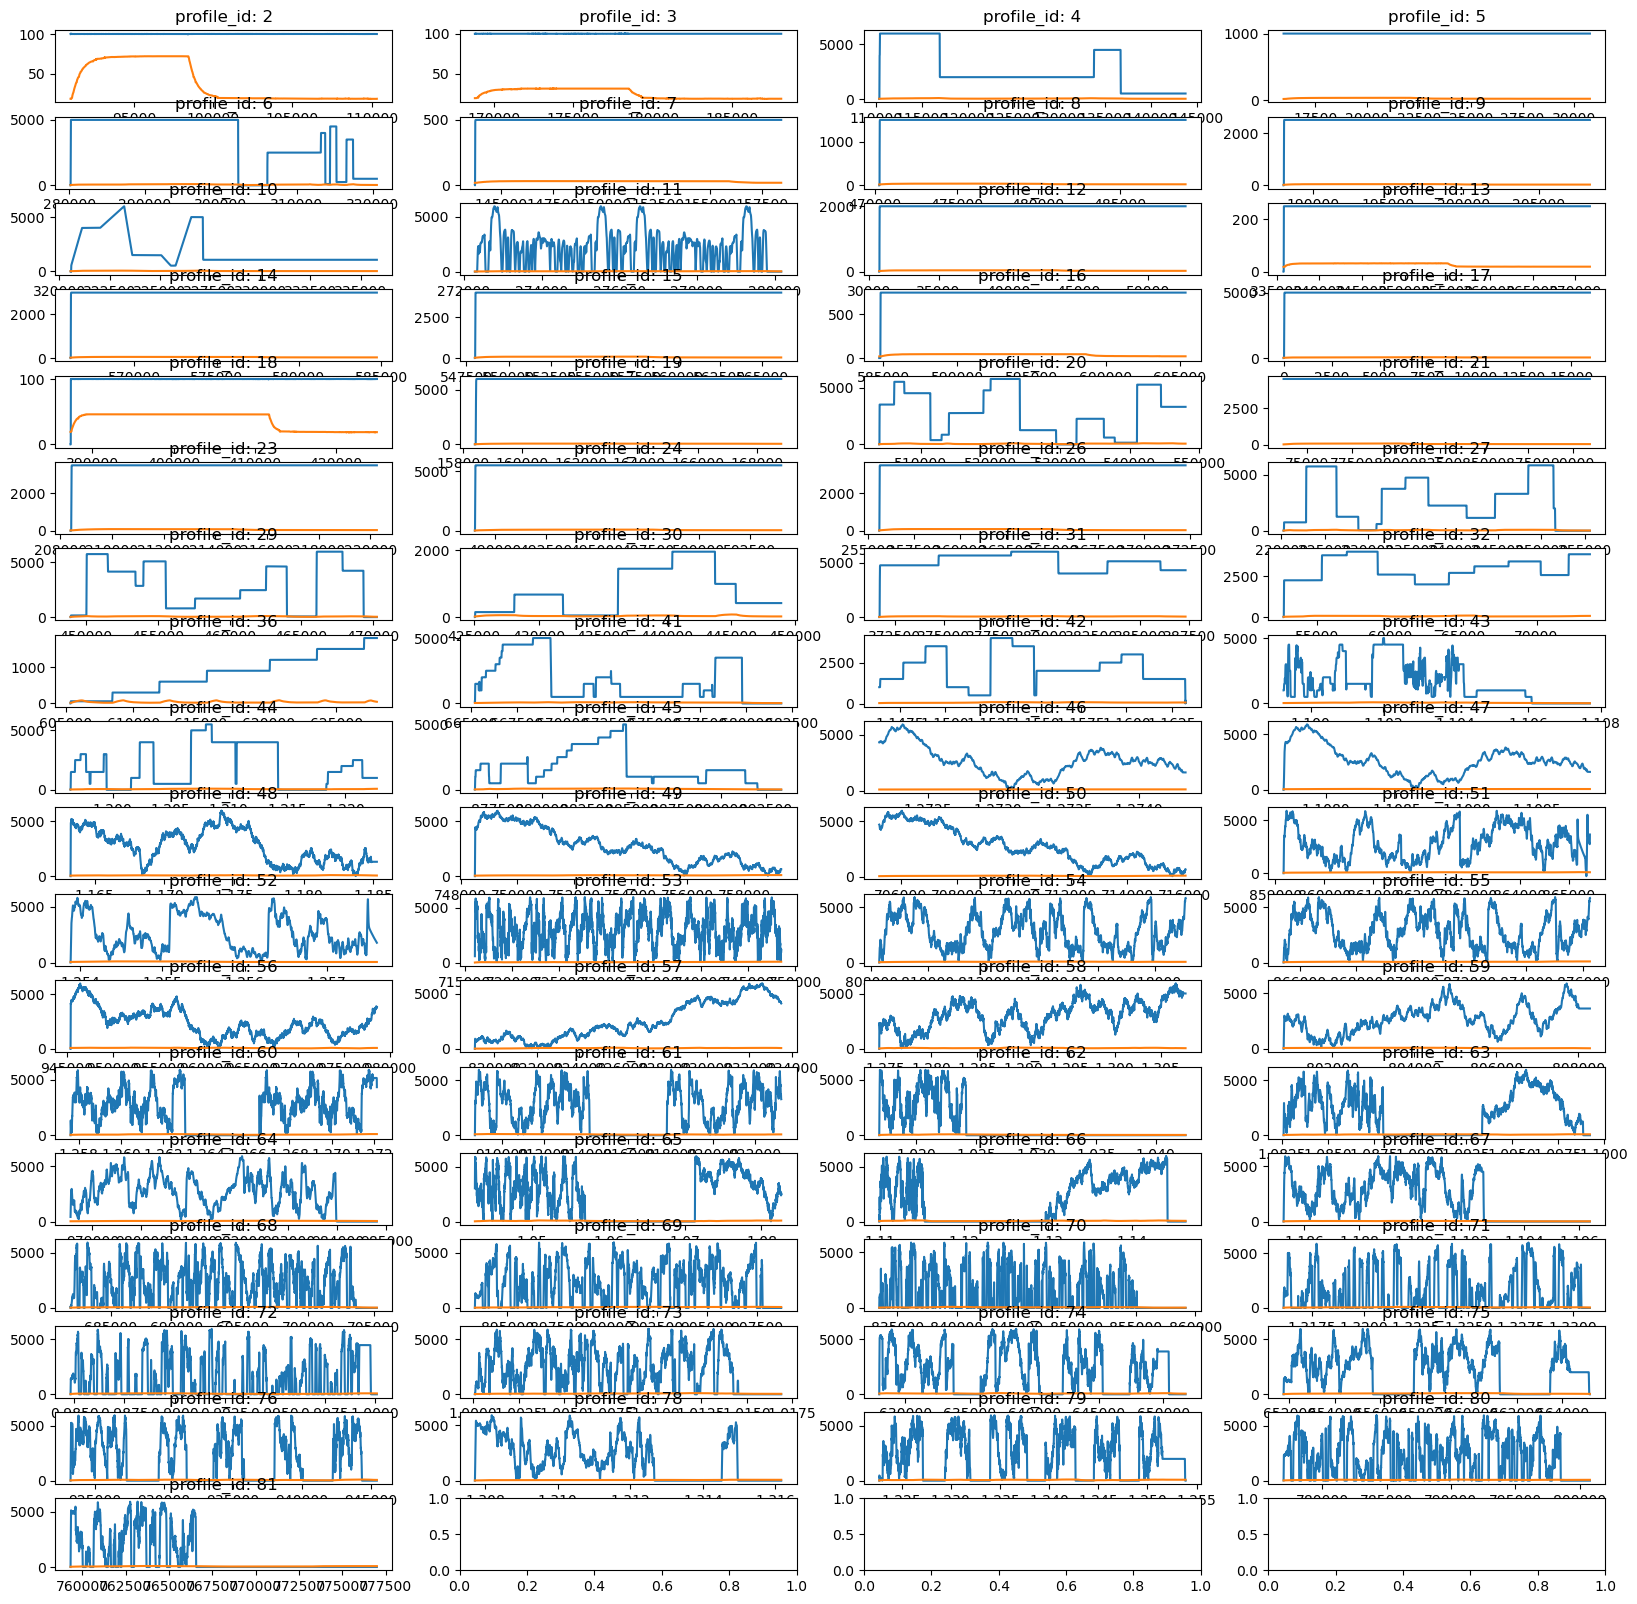

In [14]:
n_cols = 4
n_rows = len(grpd) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
for i, (pid, df_) in enumerate(grpd.items()):
    ax = axs[i // n_cols, i % n_cols]
    #df_['motor_speed'].iloc[0:2000].plot(ax=ax)
    df_['motor_speed'].plot(ax=ax)
    df_['stator_tooth'].plot(ax=ax)
    ax.set_title(f'profile_id: {pid}')

visualisation de la distribution du profil selectionné

In [1]:
import seaborn as sns

df_tmp = df[df['profile_id'] == 3]
df_tmp = df_tmp.drop(columns=['profile_id'])

n_cols = 4
n_rows = len(df_tmp.columns) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
for i, col in enumerate(df_tmp.columns):
    ax = axs[i // n_cols, i % n_cols]
    sns.distplot(df_tmp[col], ax=ax)
    ax.set_title(f'column: {col}')
plt.tight_layout();

NameError: name 'df' is not defined

correlation pour un profil

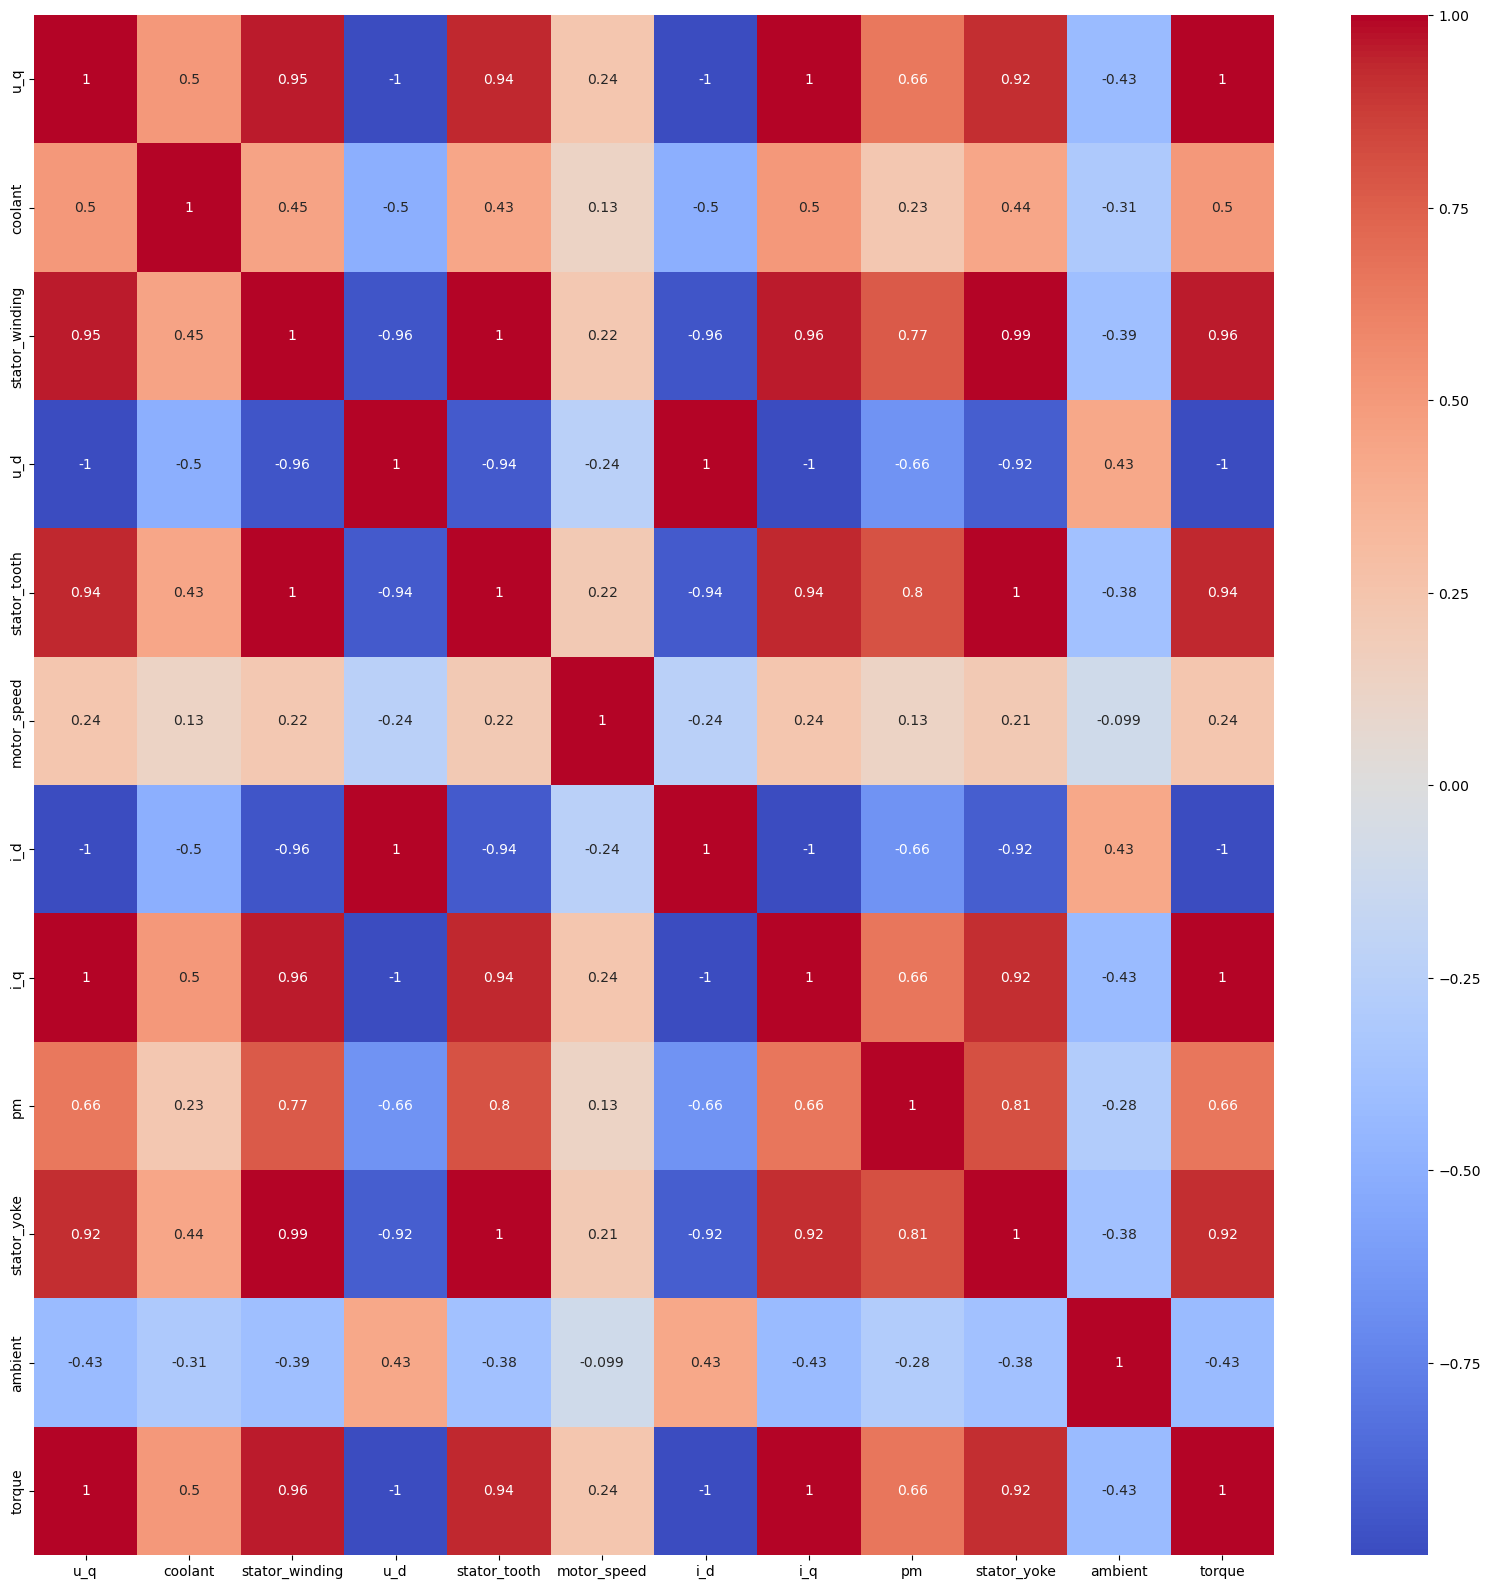

In [29]:
df_tmp = df[df['profile_id'] == 3]
df_tmp = df_tmp.drop(columns=['profile_id'])
corr_matrix = df_tmp.corr()

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()